In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [146]:
%matplotlib inline

In [147]:
df = pd.read_csv('tmdb_movies.csv')
bg = pd.read_csv('tmdb_genres.csv')

In [148]:
df.head(3)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0


#### df2 Lista 10 najwyżej ocenianych filmów

In [149]:
df2 = df[df.vote_count > df.vote_count.quantile(.75)].nlargest(10, 'vote_average')
df2

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
65,65,185000000,http://thedarkknight.warnerbros.com/dvdsite/,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Released,Why So Serious?,The Dark Knight,8.2,12002,18.0
690,690,60000000,http://thegreenmile.warnerbros.com/,497,en,The Green Mile,A supernatural tale set on death row in a Sout...,103.698022,1999-12-10,284600000,189.0,Released,Miracles do happen.,The Green Mile,8.2,4048,14.0


#### Średni przychód oraz budżet filmów w latach 2010 - 2016

In [150]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [151]:
df3 = df[(df.release_date >= '2010-01-01') & (df.release_date < '2017-01-01')]


In [152]:
z = df3.groupby(pd.Grouper(key='release_date',freq='Y')).agg({'revenue':'mean','budget':'mean'}).astype(int)
z.index = pd.DatetimeIndex(z.index).year
z

,revenue,budget
release_date,,
2010,90438110,34495410
2011,92004130,34772320
2012,116065914,34922031
2013,101348455,35523293
2014,101346599,30959887
2015,105439926,31132163
2016,139049586,45703269


In [153]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

Text(0.5, 1.0, 'Średni przychód oraz budżet filmów w latach 2010-2016')

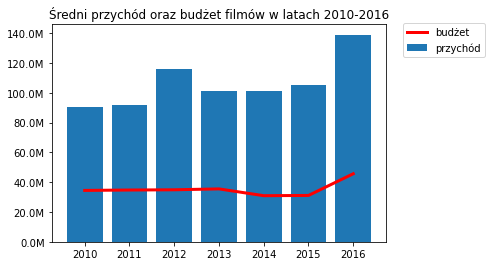

In [154]:
fig, ax = plt.subplots()
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)

ax.plot(z.index, z.budget, color='red', linewidth=3)
ax.bar(z.index, z.revenue)
plt.legend(['budżet', 'przychód'], loc=(1.05,0.85))
plt.title('Średni przychód oraz budżet filmów w latach 2010-2016') # dodajemy tytuł wykresu

#### Płączenie bazy filmów z gatunkami

In [157]:
df = df.join(bg.set_index('Unnamed: 0'), on='genre_id')
df.head(3)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action


#### Najpopularniejszy gatunek filmu na liście to "Drama"

In [158]:
df.groupby('genres').count().sort_values(by='genre_id', ascending=False)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
genres,,,,,,,,,,,,,,,,,
Drama,1207,1207,406,1207,1207,1207,1206,1207,1207,1207,1206,1207,920,1207,1207,1207,1207
Comedy,1042,1042,323,1042,1042,1042,1042,1042,1042,1042,1042,1042,871,1042,1042,1042,1042
Action,754,754,261,754,754,754,754,754,754,754,754,754,656,754,754,754,754
Adventure,339,339,160,339,339,339,339,339,339,339,339,339,312,339,339,339,339
Horror,300,300,99,300,300,300,300,300,300,300,300,300,267,300,300,300,300
Crime,195,195,70,195,195,195,195,195,195,195,195,195,166,195,195,195,195
Thriller,194,194,65,194,194,194,194,194,194,194,194,194,168,194,194,194,194
Animation,123,123,70,123,123,123,123,123,123,123,123,123,111,123,123,123,123
Fantasy,117,117,55,117,117,117,117,117,117,117,117,117,108,117,117,117,117


#### Najdłużej trwają filmy gatunku "History"

In [161]:
df.groupby('genres').mean('runtime').sort_values(by='runtime', ascending=False).astype(int)

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
genres,,,,,,,,,
History,2310,24403400,77379,19,72776016,133,6,572,36
War,1926,36552083,77776,23,64717060,126,6,691,10752
Western,3052,23182362,74914,22,49570331,117,6,625,37
Drama,2737,17979403,54354,16,45362600,115,6,483,18
Adventure,1437,65598323,36439,39,210961128,113,6,1448,12
Crime,2566,21633980,52562,19,48328882,112,6,618,80
TV Movie,3684,250000,115005,5,0,110,4,124,10770
Action,1704,47651329,50641,28,121861389,109,5,1022,28
Science Fiction,2007,49275854,56586,42,168522355,109,6,1569,878


#### Histogram przedstawiający średni czas trwania filmów z gatunku "History"

<AxesSubplot:>

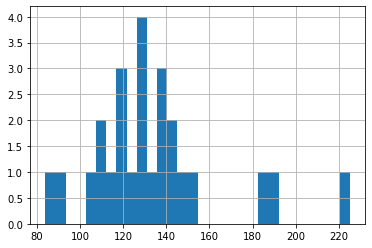

In [167]:
df6 = df[df['genres'] == 'History']
df6['runtime'].hist(bins=30)